In [0]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets

In [2]:
# ワインデータのダウンロード
wine = datasets.load_wine()
# 特徴量に色（9列）とプロリンの量(12列)を選択
X = wine.data[:,[9,12]]
# 正解ラベルの設定
y = wine.target

# 特徴量と正解ラベルを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 特徴量の標準化
sc = StandardScaler()
# 訓練データを変換器で標準化
X_train_std = sc.fit_transform(X_train)
# テストデータを作成した変換器で標準化
X_test_std = sc.transform(X_test)

print('X_train_stdの形状：',X_train_std.shape,' y_trainの形状：', y_train.shape,' X_test_stdの形状：', X_test_std.shape,' y_testの形状：', y_test.shape)

X_train_stdの形状： (142, 2)  y_trainの形状： (142,)  X_test_stdの形状： (36, 2)  y_testの形状： (36,)


In [7]:
# LinearSVCのモデルを作成
model = LinearSVC(loss='hinge', C=100.0, multi_class='ovr', penalty='l2', random_state=0)

# モデルの訓練
model.fit(X_train_std, y_train)

# テストデータで正解率を計算
y_test_pred = model.predict(X_test_std)
ac_score = accuracy_score(y_test, y_test_pred)
print('正解率 = %.2f' % (ac_score))

正解率 = 0.92


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


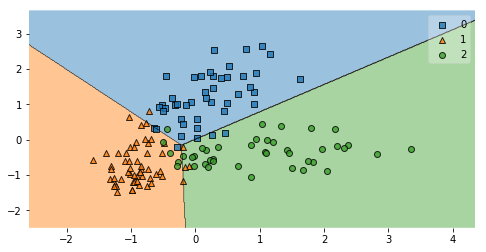

In [5]:
# ロジスティック回帰モデルによる訓練データのプロット
plt.figure(figsize=(8,4)) #プロットのサイズ指定
plot_decision_regions(X_train_std, y_train, model)

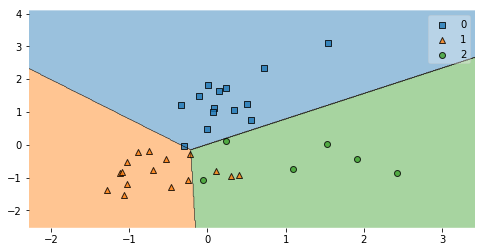

In [6]:
#  ロジスティック回帰モデルによるテストデータのプロット
plt.figure(figsize=(8,4)) #プロットのサイズ指定
plot_decision_regions(X_test_std, y_test, model)